In [184]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Adding the first Dataset

In [185]:
df = pd.read_csv("Covid vaccination neighborhoods.csv")
df.head()

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
0,Aleppo,116,419,799
1,Allegheny Center (Pittsburgh),173,524,425
2,Allegheny West (Pittsburgh),51,179,206
3,Allentown (Pittsburgh),190,748,490
4,Arlington Heights (Pittsburgh),23,63,24


#### Created a new column named Fully vaccinated

In [186]:
df['Fully vaccinated'] = ""
df = df.rename(columns={"neighborhood_municipality": "Neighborhood",})

#### Combined both fully vaccinated and vaccinated with booster in one column 

In [187]:
for index, row in df.iterrows():
    vaccinated = row['total_fully_vaccinated']+row['total_fully_vaccinated_w_booster']
    df.at[index,'Fully vaccinated']=vaccinated
    if '(Pittsburgh)' in row['Neighborhood']:
        word = row['Neighborhood']
        df.at[index,'Neighborhood'] = word.strip(' (Pittsburgh)')

df = df.drop(columns=['total_fully_vaccinated','total_fully_vaccinated_w_booster','total_partially_vaccinated'])
df['Fully vaccinated'] = df['Fully vaccinated'].astype(int)
df.head(5)

,Neighborhood,Fully vaccinated
0,Aleppo,1218
1,Allegheny Cente,949
2,Allegheny We,385
3,Allentown,1238
4,Arlington He,87


#### Show top 20 neighborhoods based on vaccinated population

In [188]:
df.nlargest(20,'Fully vaccinated')

,Neighborhood,Fully vaccinated
125,Mount Lebanon,27467
144,Penn Hills,25638
18,Bethel Park,24882
162,Ross,24739
116,McCandless,22198
169,Shaler,20507
122,Monroeville,20008
151,Plum,18325
123,Moon,17792
202,Upper Saint Clair,16730


#### Show top 20 neighborhoods based on vaccinated population as a plot

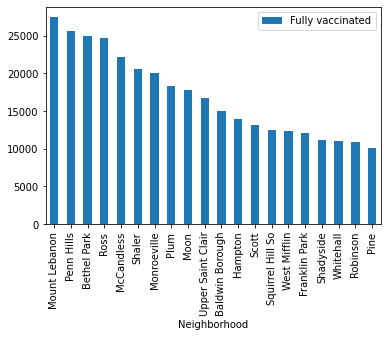

In [189]:
df.nlargest(20,'Fully vaccinated').plot(x='Neighborhood',y='Fully vaccinated',kind="bar")

## Adding the second Dataset

In [190]:
df1 = pd.read_csv("Neighborhoods_with_SNAP_Data.csv")
df1

,FID,Neighborhood_2010_FID_BlockG,Neighborhood_2010_STATEFP10,Neighborhood_2010_COUNTYFP10,Neighborhood_2010_TRACTCE10,Neighborhood_2010_BLKGRPCE10,Neighborhood_2010_GEOID10,Neighborhood_2010_NAMELSAD10,Neighborhood_2010_MTFCC10,Neighborhood_2010_FUNCSTAT10,...,SNAP_All_csv_Commute_to_Work__C,SNAP_All_csv_Commute_to_Work__P,SNAP_All_csv_Commute_to_Work__T,SNAP_All_csv_Commute_to_Work__M,SNAP_All_csv_Commute_to_Work__B,SNAP_All_csv_Commute_to_Work__W,SNAP_All_csv_Commute_to_Work__O,SNAP_All_csv_Work_at_Home__2010,SHAPE_Length,SHAPE_Area
0,1,0,42,3,40500,1,420030405001,Block Group 1,G5030,S,...,6.9%,13.3%,0.0%,0.0%,0.0%,62.4%,0.0%,1.2%,11525.904546,7.842997e+06
1,2,1,42,3,40400,1,420030404001,Block Group 1,G5030,S,...,7.2%,11.5%,0.4%,0.0%,2.9%,52.6%,0.4%,4.4%,20945.562570,1.390469e+07
2,3,2,42,3,40200,2,420030402002,Block Group 2,G5030,S,...,1.0%,22.1%,0.0%,0.0%,0.0%,40.8%,0.7%,0.0%,18280.484515,5.998649e+06
3,4,3,42,3,30500,2,420030305002,Block Group 2,G5030,S,...,9.6%,16.5%,2.0%,0.0%,0.0%,6.5%,0.0%,0.0%,15694.771444,7.203631e+06
4,5,5,42,3,20300,1,420030203001,Block Group 1,G5030,S,...,19.1%,18.1%,0.0%,0.0%,0.0%,0.0%,0.0%,9.0%,24019.532672,1.694875e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,265,42,3,563000,4,420035630004,Block Group 4,G5030,S,...,7.9%,14.6%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,9978.225999,3.683820e+06
86,87,298,42,3,563100,3,420035631003,Block Group 3,G5030,S,...,4.7%,0.0%,0.0%,0.0%,0.0%,14.9%,0.0%,0.0%,16308.779881,1.024662e+07
87,88,32,42,3,562600,1,420035626001,Block Group 1,G5030,S,...,17.2%,15.6%,0.0%,18.8%,0.0%,0.0%,0.0%,0.0%,18778.991513,5.579476e+06
88,89,57,42,3,250700,1,420032507001,Block Group 1,G5030,S,...,0.0%,41.0%,0.0%,0.0%,0.0%,13.7%,0.0%,0.0%,11709.518764,6.050817e+06


#### Choosing the metrics we want and renaming them to look better

In [191]:
df1 = df1[['SNAP_All_csv_Neighborhood','Total___Jobs_Located_in_N_hood_']]
df1 = df1.rename(columns={"SNAP_All_csv_Neighborhood": "Neighborhood","Total___Jobs_Located_in_N_hood_": "Jobs located in the neighborhood"})
df1.head(10)


,Neighborhood,Jobs located in the neighborhood
0,Central Oakland,3862
1,North Oakland,18174
2,West Oakland,12895
3,Crawford-Roberts,884
4,Strip District,11228
5,Central Business District,95545
6,Spring Hill-City View,270
7,Perry South,987
8,Summer Hill,157
9,Northview Heights,210


#### Show top 20 neighborhoods based on Jobs Availablity 

In [192]:
df1.nlargest(20,'Jobs located in the neighborhood')

,Neighborhood,Jobs located in the neighborhood
5,Central Business District,95545
1,North Oakland,18174
2,West Oakland,12895
4,Strip District,11228
14,South Side Flats,10170
57,Shadyside,9027
17,Bluff,8800
65,Squirrel Hill North,8671
63,Chateau,6870
32,Bloomfield,6799


#### Show top 20 neighborhoods based on Jobs Availablity as a plot

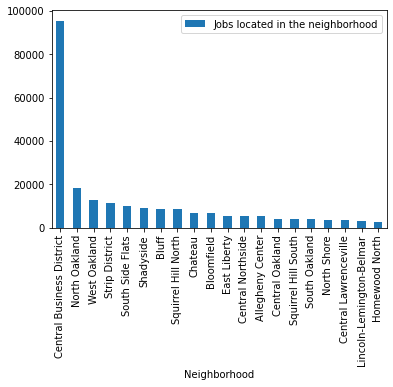

In [193]:
df1.nlargest(20,'Jobs located in the neighborhood').plot(x='Neighborhood',y='Jobs located in the neighborhood',kind="bar")

## Adding the third Dataset

In [194]:
df2 = pd.read_csv("school enrollment neighborhood.csv")
df2

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Enrolled in school:,Margin of Error; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool","Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Margin of Error; Enrolled in school: - Enrolled in kindergarten,...,Estimate; Enrolled in school: - Enrolled in grade 11,Margin of Error; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Margin of Error; Enrolled in school: - Enrolled in grade 12,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years","Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Enrolled in school: - Graduate or professional school,Margin of Error; Enrolled in school: - Graduate or professional school,Estimate; Not enrolled in school,Margin of Error; Not enrolled in school
0,Allegheny Center,1,1389.0,193.000000,394.0,120.000000,48.0,29.000000,0.0,10.000000,...,0.0,10.000000,21.0,32.000000,150.0,60.000000,51.0,35.000000,995.0,135.000000
1,Allegheny West,2,343.0,96.000000,61.0,44.000000,0.0,10.000000,0.0,10.000000,...,9.0,12.000000,0.0,10.000000,2.0,4.000000,25.0,22.000000,282.0,74.000000
2,Allentown,3,2520.0,449.503059,965.0,312.800256,19.0,22.825424,23.0,28.722813,...,41.0,53.823787,81.0,72.718636,125.0,87.120606,74.0,101.469207,1555.0,267.807767
3,Arlington,4,1823.0,342.302498,427.0,127.722355,7.0,17.916473,6.0,17.916473,...,37.0,27.000000,17.0,27.856777,142.0,69.231496,16.0,18.493242,1396.0,267.159129
4,Arlington Heights,5,213.0,115.000000,40.0,49.000000,28.0,49.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,12.0,14.000000,0.0,10.000000,173.0,87.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,2662.0,391.154701,625.0,206.211057,82.0,69.455021,18.0,32.264532,...,52.0,45.705580,45.0,46.346521,85.0,53.497664,98.0,57.913729,2037.0,274.100347
87,West End,88,235.0,138.000000,71.0,60.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,71.0,60.000000,0.0,10.000000,164.0,101.000000
88,West Oakland,89,1681.0,280.850494,791.0,229.002183,17.0,20.591260,0.0,14.142136,...,3.0,11.180340,13.0,23.259407,508.0,211.123187,148.0,69.634761,890.0,149.241415
89,Westwood,90,3303.0,370.276923,629.0,189.200951,75.0,56.044625,65.0,61.619802,...,33.0,24.596748,0.0,14.142136,178.0,77.781746,13.0,20.591260,2674.0,256.095685


#### Choosing the metrics we want and creating a new column

In [195]:
df2 = df2[['Neighborhood','Estimate; Enrolled in school: - Enrolled in college, undergraduate years','Estimate; Enrolled in school: - Graduate or professional school']]
df2['Enrolled in undergraduate or graduate school']= ""

<ipython-input-195-4ea3165a6d7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Enrolled in undergraduate or graduate school']= ""


#### Combining those Graduate and Undergraduate students in one column

In [196]:
for index, row in df2.iterrows():
    enrolled = row['Estimate; Enrolled in school: - Enrolled in college, undergraduate years']+row['Estimate; Enrolled in school: - Graduate or professional school']
    df2.at[index,'Enrolled in undergraduate or graduate school']=enrolled

df2 = df2.drop(columns=['Estimate; Enrolled in school: - Enrolled in college, undergraduate years','Estimate; Enrolled in school: - Graduate or professional school'])
df2['Enrolled in undergraduate or graduate school'] = df2['Enrolled in undergraduate or graduate school'].astype(int)
df2.head(5)

,Neighborhood,Enrolled in undergraduate or graduate school
0,Allegheny Center,201
1,Allegheny West,27
2,Allentown,199
3,Arlington,158
4,Arlington Heights,12


#### Show top 20 Neighborhoods based on college enrollment

In [197]:
df2.nlargest(20,'Enrolled in undergraduate or graduate school')

,Neighborhood,Enrolled in undergraduate or graduate school
56,North Oakland,6983
76,Squirrel Hill North,4685
19,Central Oakland,4613
68,Shadyside,4167
10,Bluff,3537
77,Squirrel Hill South,2499
72,South Side Flats,1850
9,Bloomfield,1676
16,Central Business District,1616
70,South Oakland,1381


#### Show top 20 Neighborhoods based on college enrollment as a plot

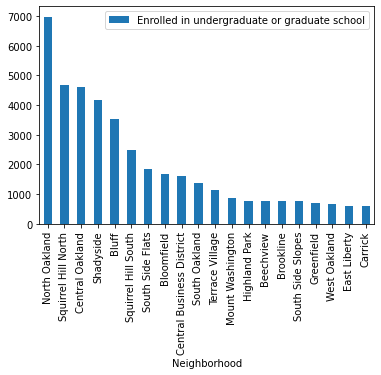

In [198]:
df2.nlargest(20,'Enrolled in undergraduate or graduate school').plot(x='Neighborhood',y='Enrolled in undergraduate or graduate school',kind="bar")

## Checking occurance of neighborhoods in all metrics' datasets that contains the top 20

#### Checking Top 20 in DF2

In [203]:
count = dict()

for index, row in df2.nlargest(30,'Enrolled in undergraduate or graduate school').iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in count:
        count[neighborhood] = count[neighborhood] + 1
    else:
        count[neighborhood] = 1


#### Checking Top 20 in DF1

In [204]:
for index, row in df1.nlargest(30,'Jobs located in the neighborhood').iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in count:
        count[neighborhood] = count[neighborhood] + 1
    else:
        count[neighborhood] = 1

#### Checking Top 20 in DF

In [205]:
for index, row in df.nlargest(30,'Fully vaccinated').iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in count:
        count[neighborhood] = count[neighborhood] + 1
    else:
        count[neighborhood] = 1

#### Sort the top five neighborhoods based on their occurance in the top lists

In [206]:
sorted(count.items(), key = lambda x:x[1], reverse = True)[:5]

[('Shadyside', 3),
 ('Brookline', 3),
 ('North Oakland', 2),
 ('Squirrel Hill North', 2),
 ('Central Oakland', 2)]